In [1]:
import pandas as pd
from app.src.generate_rating_red import *


In [2]:
df_compile_stats = pd.read_csv('data/targeted/compile_stats.csv')
df_goalk_stats = pd.read_csv('data/targeted/goalkeepers_data.csv')

In [3]:
rezult_rating_red = process_and_save(df_compile_stats)

Файл сохранен: data\processed\red_method\player_stats.csv
Файл сохранен: data\processed\red_method\player_stats_with_points.csv


Уникальных игр в сезоне: 5
Уникальных команд в сезоне: 1
Уникальных игроков по амплуа:
  Амплуа 9.0: 1
  Амплуа 10.0: 3
Файл сохранен: data\processed\red_method\player_stats.csv
Файл сохранен: data\processed\red_method\season_player_stats_with_points.csv


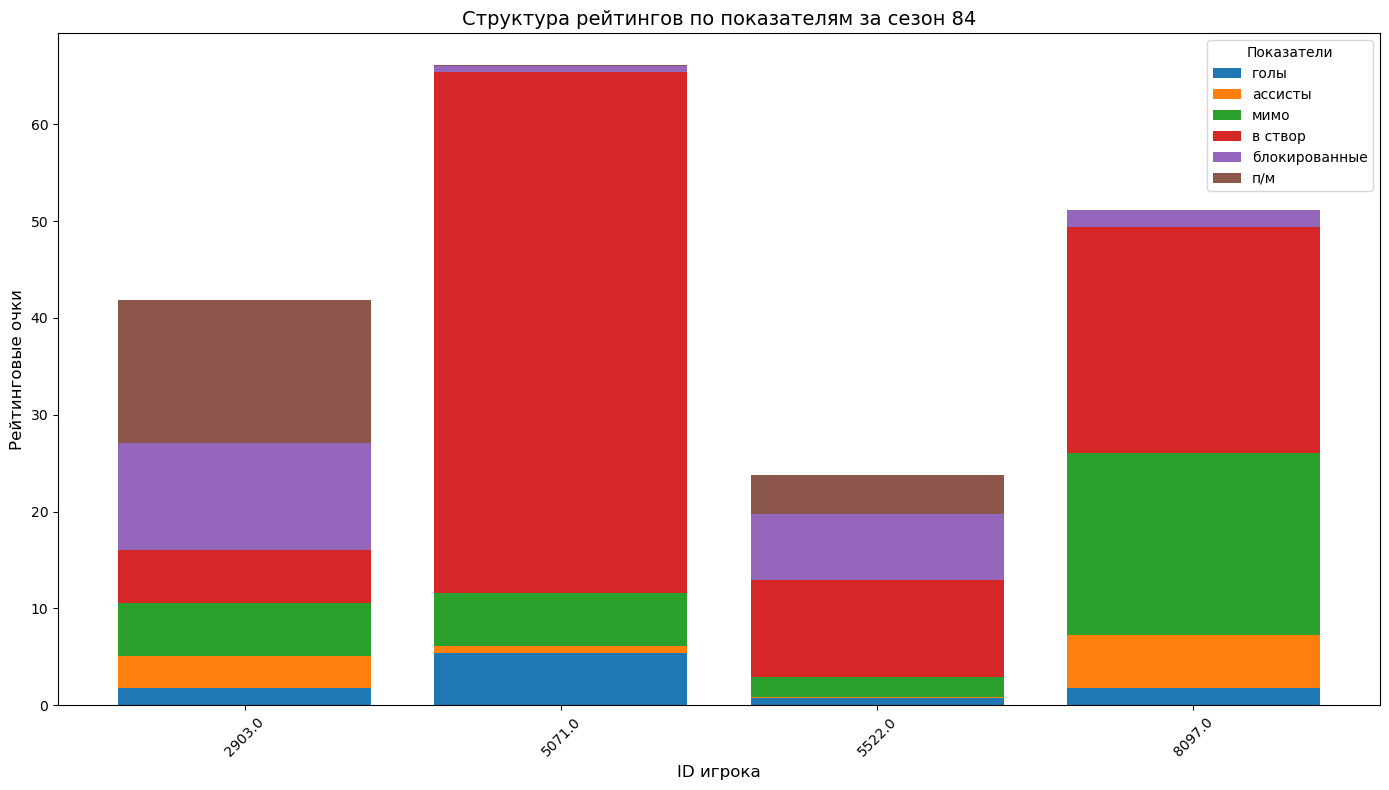

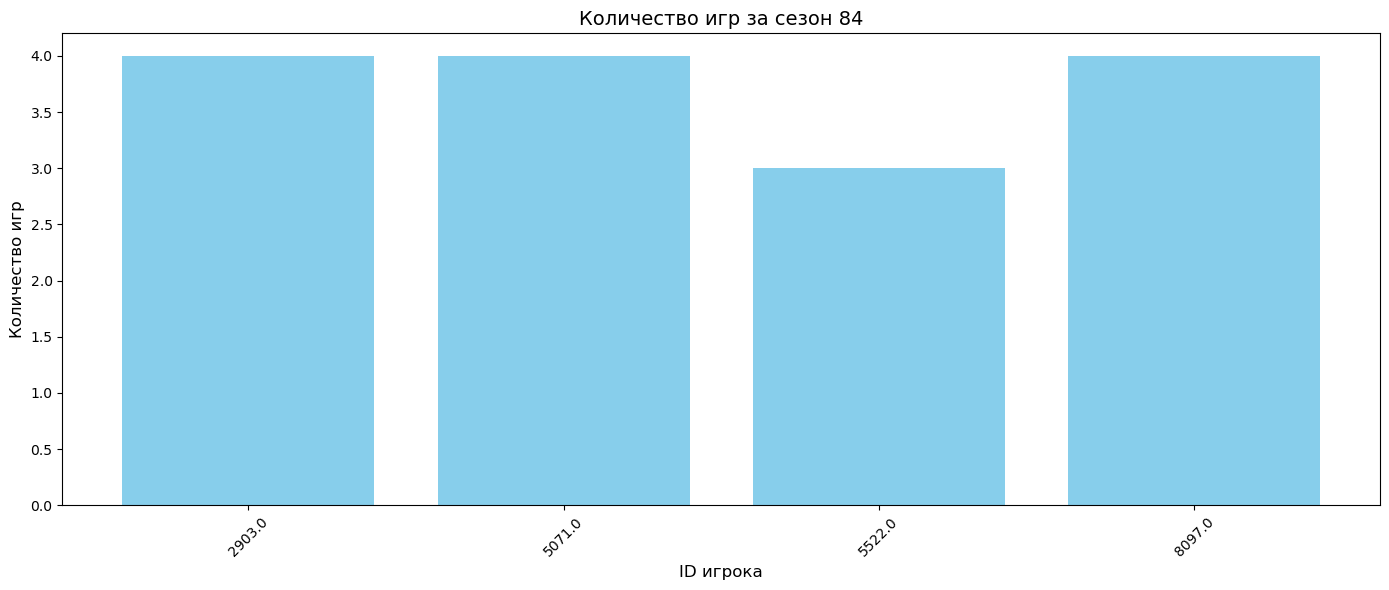

In [4]:
compile_stats_path = r"data/targeted/compile_stats.csv"
game_history_path = r"data/raw/game_history.csv"

season_id = 84

result_df = process_season(compile_stats_path, game_history_path, season_id, player_ids = [8097, 5522, 5071, 2903])

plot_player_ratings(result_df, season_id)

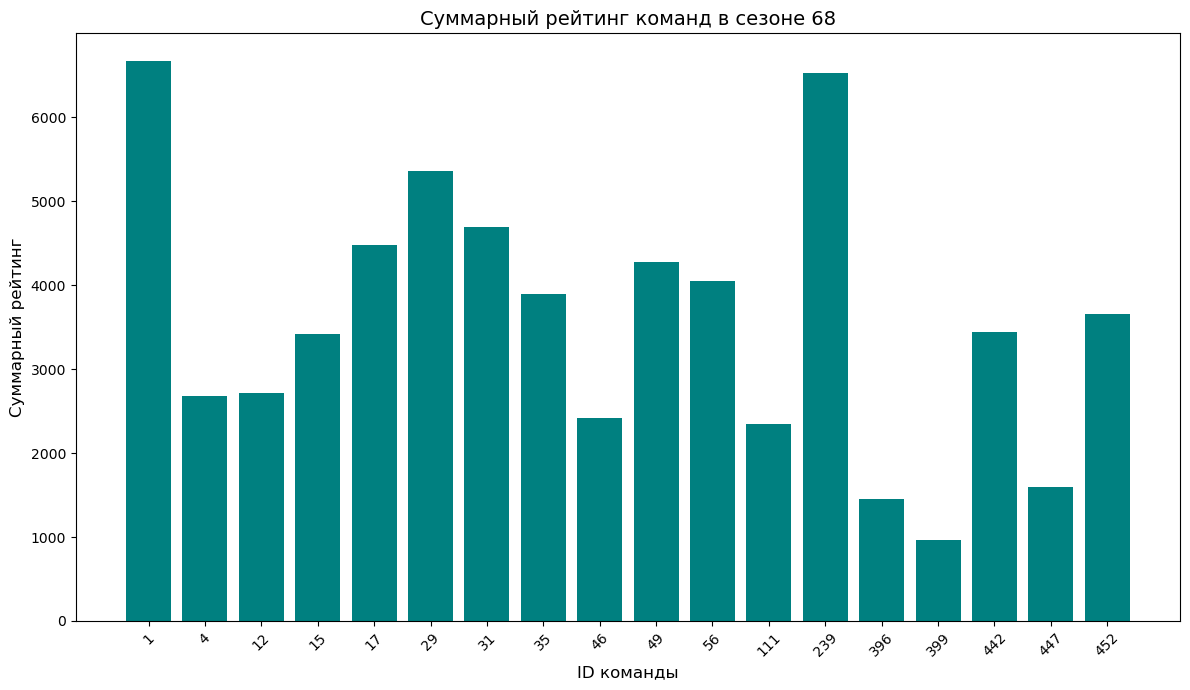

,ID team,team_rating
0,1,6665.75
1,4,2674.32
2,12,2712.57
3,15,3412.48
4,17,4474.50
5,29,5359.87
6,31,4687.83
7,35,3898.05
8,46,2420.05
9,49,4272.49


In [5]:
plot_team_ratings(compile_stats_path, game_history_path, 68)